In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode
import scipy.optimize as spo

In [2]:
def Prior(p):
    return np.piecewise( p, [p>= 0 and p <= 1, p<0 and p > 1], [lambda p: 1, lambda p:0])

In [3]:
Prior = np.vectorize(Prior)

In [4]:
def Likelihood(p,r,n):
    return p**r*(1-p)**(n-r)

In [5]:
def Posterior(p,r,n):
    return Likelihood(p,r,n)*Prior(p)

In [59]:
def Metropolis(x0, Posterior, NSteps=int(1e5), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i-1],r,n)
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        P1 = Posterior(xf,r,n)     
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

In [60]:
p = np.linspace(0,1,100)
r = 7
n = 10
Pos = Posterior(p,r,n)

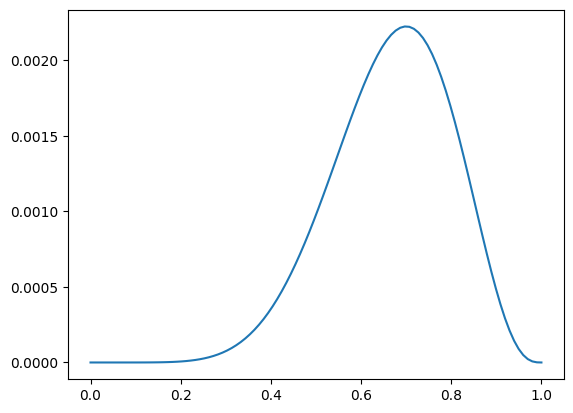

In [61]:
plt.plot(p,Pos)

In [62]:
I,_ = integrate.quad(Posterior,p[0],p[-1],args=(r,n))
I

0.0007575757575757576

In [65]:
initparams = np.array([0.2])
MCMC = Metropolis(initparams,Posterior)

100%|██████████████████████████████████████████████████████████████████████████| 99999/99999 [00:12<00:00, 8153.07it/s]


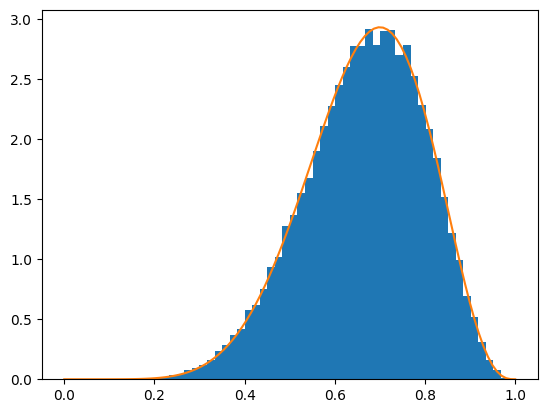

In [66]:
plt.hist(MCMC,density=True,bins=50)
plt.plot(p,Pos/I)

In [76]:
mediana = np.percentile(MCMC, 50)
mediana

0.6755411167329658

In [77]:
liminf = np.percentile(MCMC,16)
liminf

0.5294742586005294

In [78]:
limsup = np.percentile(MCMC,84)
limsup

0.8000342041970024

$\hat{p} = 0.67^{0.53}_{0.80} at \%68 CL$ 

In [79]:
std = np.std(MCMC)
std

0.131796331967098

Para concluir si la moneda esta truncada o no, es necesario considerar el valor posterior para una moneda justa, el cual corresponde a (0.5). Atendiendo a esto, como dicho valor no se encuentra en el rango $\pm \sigma$, entonces se puede decir que la moneda no es justa a un $68\%$ 